In [154]:
import requests, bs4, csv, timeit, datetime
import pandas as pd

#Datetime to change the date to a datetime
from datetime import date

# Imports of matplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
sns.set(rc={'figure.figsize':(30,20)})

### Behandling af  "Masterfile" fra forumscraperen:

In [155]:
#Mapping funktioner
def remove_op(x):
    if x[-2:] == "OP":
        return x[:-3]
    else:
        return x


In [156]:
df1 = pd.read_csv('Masterfile.csv', index_col=0)
df1["thread_created"] = pd.to_datetime(df1["thread_created"], dayfirst=True)
df1["meta_date_time"] = pd.to_datetime(df1["meta_date_time"], dayfirst=True)
df1["user"] = df1["user"].map(remove_op)
#df1["isna"] = df1["comment_text"].isna()
#df1.loc[df1["isna"] == True]
df1["comment_text"] = df1["comment_text"].fillna("")
df1

,thread,thread_created,user,user_link,user_created,user_post_amount,comment_text,meta_date_time,meta_rank_order,meta_likes
0,Ukraine vs Rusland krig V5,2022-03-28,dankjar,https://www.pokernet.dk/profiler/780.html,2004,2708,V4 tråden var blevet for tung så på tide med e...,2022-03-28 00:43:00,1,3
1,Ukraine vs Rusland krig V5,2022-03-28,dankjar,https://www.pokernet.dk/profiler/780.html,2004,2708,De russere har altså en dårlig vane med at bru...,2022-03-28 21:01:00,2,1
2,Ukraine vs Rusland krig V5,2022-03-28,pantherdk,https://www.pokernet.dk/profiler/686.html,2004,6666,dankjar skrev:De russere har altså en dårlig v...,2022-03-28 21:48:00,3,0
3,Ukraine vs Rusland krig V5,2022-03-28,dankjar,https://www.pokernet.dk/profiler/780.html,2004,2708,"Enig, det er lidt spøjst og svært at se hvad d...",2022-03-28 22:05:00,4,0
4,Ukraine vs Rusland krig V5,2022-03-28,pantherdk,https://www.pokernet.dk/profiler/686.html,2004,6666,"dankjar skrev:Enig, det er lidt spøjst og svær...",2022-03-28 22:21:00,5,0
...,...,...,...,...,...,...,...,...,...,...
62412,Gode råd ift. banklån og realkreditlån,2018-04-13,NotACop,https://www.pokernet.dk/profiler/49337.html,2013,2930,udlejer skrev:Fastforrentet lån og banklån er ...,2018-04-14 14:11:00,29,0
62413,Gode råd ift. banklån og realkreditlån,2018-04-13,Hugging Gun,https://www.pokernet.dk/profiler/49316.html,2012,4790,NotACop skrev:Så du ville i min situation have...,2018-04-14 14:53:00,30,0
62414,Gode råd ift. banklån og realkreditlån,2018-04-13,Hugging Gun,https://www.pokernet.dk/profiler/49316.html,2012,4790,"Når det så er sagt, så ved jeg også hvor ivrig...",2018-04-14 14:58:00,31,0
62415,Gode råd ift. banklån og realkreditlån,2018-04-13,NotACop,https://www.pokernet.dk/profiler/49337.html,2013,2930,"Hugging Gun skrev:Når det så er sagt, så ved j...",2018-04-14 15:31:00,32,0


In [157]:
def is_reply(text):
    reply = text.split(":")
    if reply[0][-6:] == " skrev":
        return reply[0]


In [158]:
df1["reply"] = df1["comment_text"].map(is_reply)
df1.loc[df1["reply"] != None]


,thread,thread_created,user,user_link,user_created,user_post_amount,comment_text,meta_date_time,meta_rank_order,meta_likes,reply
0,Ukraine vs Rusland krig V5,2022-03-28,dankjar,https://www.pokernet.dk/profiler/780.html,2004,2708,V4 tråden var blevet for tung så på tide med e...,2022-03-28 00:43:00,1,3,None
1,Ukraine vs Rusland krig V5,2022-03-28,dankjar,https://www.pokernet.dk/profiler/780.html,2004,2708,De russere har altså en dårlig vane med at bru...,2022-03-28 21:01:00,2,1,None
2,Ukraine vs Rusland krig V5,2022-03-28,pantherdk,https://www.pokernet.dk/profiler/686.html,2004,6666,dankjar skrev:De russere har altså en dårlig v...,2022-03-28 21:48:00,3,0,dankjar skrev
3,Ukraine vs Rusland krig V5,2022-03-28,dankjar,https://www.pokernet.dk/profiler/780.html,2004,2708,"Enig, det er lidt spøjst og svært at se hvad d...",2022-03-28 22:05:00,4,0,None
4,Ukraine vs Rusland krig V5,2022-03-28,pantherdk,https://www.pokernet.dk/profiler/686.html,2004,6666,"dankjar skrev:Enig, det er lidt spøjst og svær...",2022-03-28 22:21:00,5,0,dankjar skrev
...,...,...,...,...,...,...,...,...,...,...,...
62412,Gode råd ift. banklån og realkreditlån,2018-04-13,NotACop,https://www.pokernet.dk/profiler/49337.html,2013,2930,udlejer skrev:Fastforrentet lån og banklån er ...,2018-04-14 14:11:00,29,0,udlejer skrev
62413,Gode råd ift. banklån og realkreditlån,2018-04-13,Hugging Gun,https://www.pokernet.dk/profiler/49316.html,2012,4790,NotACop skrev:Så du ville i min situation have...,2018-04-14 14:53:00,30,0,NotACop skrev
62414,Gode råd ift. banklån og realkreditlån,2018-04-13,Hugging Gun,https://www.pokernet.dk/profiler/49316.html,2012,4790,"Når det så er sagt, så ved jeg også hvor ivrig...",2018-04-14 14:58:00,31,0,None
62415,Gode råd ift. banklån og realkreditlån,2018-04-13,NotACop,https://www.pokernet.dk/profiler/49337.html,2013,2930,"Hugging Gun skrev:Når det så er sagt, så ved j...",2018-04-14 15:31:00,32,0,Hugging Gun skrev


In [159]:
df1.loc[df1["user"] == "Eilama"]["thread"].value_counts()

Ukraine vs Rusland krig       62
Ukraine vs Rusland krig V4    47
Ukraine vs Rusland krig V5     3
Name: thread, dtype: int64

In [160]:
df1

,thread,thread_created,user,user_link,user_created,user_post_amount,comment_text,meta_date_time,meta_rank_order,meta_likes,reply
0,Ukraine vs Rusland krig V5,2022-03-28,dankjar,https://www.pokernet.dk/profiler/780.html,2004,2708,V4 tråden var blevet for tung så på tide med e...,2022-03-28 00:43:00,1,3,None
1,Ukraine vs Rusland krig V5,2022-03-28,dankjar,https://www.pokernet.dk/profiler/780.html,2004,2708,De russere har altså en dårlig vane med at bru...,2022-03-28 21:01:00,2,1,None
2,Ukraine vs Rusland krig V5,2022-03-28,pantherdk,https://www.pokernet.dk/profiler/686.html,2004,6666,dankjar skrev:De russere har altså en dårlig v...,2022-03-28 21:48:00,3,0,dankjar skrev
3,Ukraine vs Rusland krig V5,2022-03-28,dankjar,https://www.pokernet.dk/profiler/780.html,2004,2708,"Enig, det er lidt spøjst og svært at se hvad d...",2022-03-28 22:05:00,4,0,None
4,Ukraine vs Rusland krig V5,2022-03-28,pantherdk,https://www.pokernet.dk/profiler/686.html,2004,6666,"dankjar skrev:Enig, det er lidt spøjst og svær...",2022-03-28 22:21:00,5,0,dankjar skrev
...,...,...,...,...,...,...,...,...,...,...,...
62412,Gode råd ift. banklån og realkreditlån,2018-04-13,NotACop,https://www.pokernet.dk/profiler/49337.html,2013,2930,udlejer skrev:Fastforrentet lån og banklån er ...,2018-04-14 14:11:00,29,0,udlejer skrev
62413,Gode råd ift. banklån og realkreditlån,2018-04-13,Hugging Gun,https://www.pokernet.dk/profiler/49316.html,2012,4790,NotACop skrev:Så du ville i min situation have...,2018-04-14 14:53:00,30,0,NotACop skrev
62414,Gode råd ift. banklån og realkreditlån,2018-04-13,Hugging Gun,https://www.pokernet.dk/profiler/49316.html,2012,4790,"Når det så er sagt, så ved jeg også hvor ivrig...",2018-04-14 14:58:00,31,0,None
62415,Gode råd ift. banklån og realkreditlån,2018-04-13,NotACop,https://www.pokernet.dk/profiler/49337.html,2013,2930,"Hugging Gun skrev:Når det så er sagt, så ved j...",2018-04-14 15:31:00,32,0,Hugging Gun skrev


In [161]:
thread_starters = df1.loc[df1["meta_rank_order"] == 1]["user"].value_counts()
thread_starters = pd.DataFrame(thread_starters).reset_index()
thread_starters.columns = ["user", "total threads created"]
thread_starters.style.hide_index()
thread_starters.loc[thread_starters["total threads created"] >= thread_starters["total threads created"]]


,user,total threads created
0,Newtood,35
1,All-Out-Put,25
2,cains,21
3,Rambam,19
4,Henze05,17
...,...,...
375,-KD-,1
376,SamShepherd,1
377,HOFFEH,1
378,SimonRN97,1


In [162]:
new_df = df1[["thread", "user", "user_created"]]
header = ["thread", "user", "year", "active_threads"]
active_df = pd.DataFrame(new_df, columns=header)

#How many threads a user appears in

active_df = active_df.groupby(["thread", "user"]).size().reset_index()["user"].value_counts()
active_df = pd.DataFrame(active_df).reset_index()
active_df.columns = ["user", "active threads"]
active_df.style.hide_index()
active_df.loc[active_df["active threads"] >= active_df["active threads"]]

#new_df.loc["t".value_counts()


,user,active threads
0,NanoQ,310
1,grovfil,262
2,Aurvandil,245
3,djoffer,196
4,tuznelda,180
...,...,...
1474,Hofmeister,1
1475,NoStarX,1
1476,progzx,1
1477,mismis,1


In [163]:
dupe = df1.drop_duplicates(subset=["user_link"])
dupe["user_created"].value_counts()

posts_df = df1["user"].value_counts()

posts_df = pd.DataFrame(posts_df).reset_index()
posts_df.columns = ["user", "total posts"]
posts_df.loc[posts_df["total posts"] >= posts_df["total posts"]]
#posts_df
#.style.hide_index()
#df1["user_created"].value_counts()

,user,total posts
0,NanoQ,1654
1,pantherdk,1370
2,grovfil,911
3,Jigra,911
4,Torstens,835
...,...,...
1474,Bentzah,1
1475,Candycrack,1
1476,zazzy,1
1477,snizzle,1


In [164]:
year_df = df1[["user", "user_created"]]
year_df["user"] = year_df["user"].drop_duplicates()
year_df = year_df.dropna()
year_df.reset_index(inplace=True, drop="True")
year_df



C:\Users\Alexander\AppData\Local\Temp\ipykernel_14328\2316862731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df["user"] = year_df["user"].drop_duplicates()


,user,user_created
0,dankjar,2004
1,pantherdk,2004
2,LoneRangR,2005
3,KageKongen,2006
4,Tsunemi,2013
...,...,...
1474,qwerty27,2017
1475,Superficious,2011
1476,tåbeligt,2005
1477,WOH1,2012


In [165]:
calculated_df = posts_df.merge(active_df, how="inner", on="user")
calculated_df["posts per thread"] = (calculated_df["total posts"] / calculated_df["active threads"]).round(decimals=2)

calculated_df = calculated_df.sort_values("total posts", ascending=False)

calculated_df["percentage of total posts"] = (calculated_df["total posts"] / len(df1) * 100).round(decimals=2)#.astype(str) + "%"

calculated_df = calculated_df.merge(year_df, how="inner", on="user")

calculated_df = calculated_df.merge(thread_starters, how="left", on="user").fillna(0)
calculated_df.sort_values(by="total posts", ascending=False)

calculated_df = calculated_df[["user", "user_created", "total posts", "percentage of total posts", "active threads", "posts per thread", "total threads created"]]
calculated_df["total threads created"] = calculated_df["total threads created"].astype("int64")

calculated_df.describe().round(decimals=2)#.to_excel("description_of_users.xlsx")
calculated_df

,user,user_created,total posts,percentage of total posts,active threads,posts per thread,total threads created
0,NanoQ,2005,1654,2.65,310,5.34,8
1,pantherdk,2004,1370,2.19,117,11.71,1
2,grovfil,2005,911,1.46,262,3.48,12
3,Jigra,2014,911,1.46,91,10.01,0
4,Torstens,2005,835,1.34,123,6.79,1
...,...,...,...,...,...,...,...
1474,abberline,2006,1,0.00,1,1.00,0
1475,Casper_PL,2013,1,0.00,1,1.00,0
1476,Gasberg,2008,1,0.00,1,1.00,0
1477,Lord dahl,2011,1,0.00,1,1.00,0


**Models:**

In [166]:
def amount(x):
    if x >= 100:
        return "100+"
    elif x >= 50:
        return "50-99"
    elif x >= 25:
        return "25-49"
    else:
        return x

In [167]:
model_df = df1

<AxesSubplot:xlabel='meta_likes'>

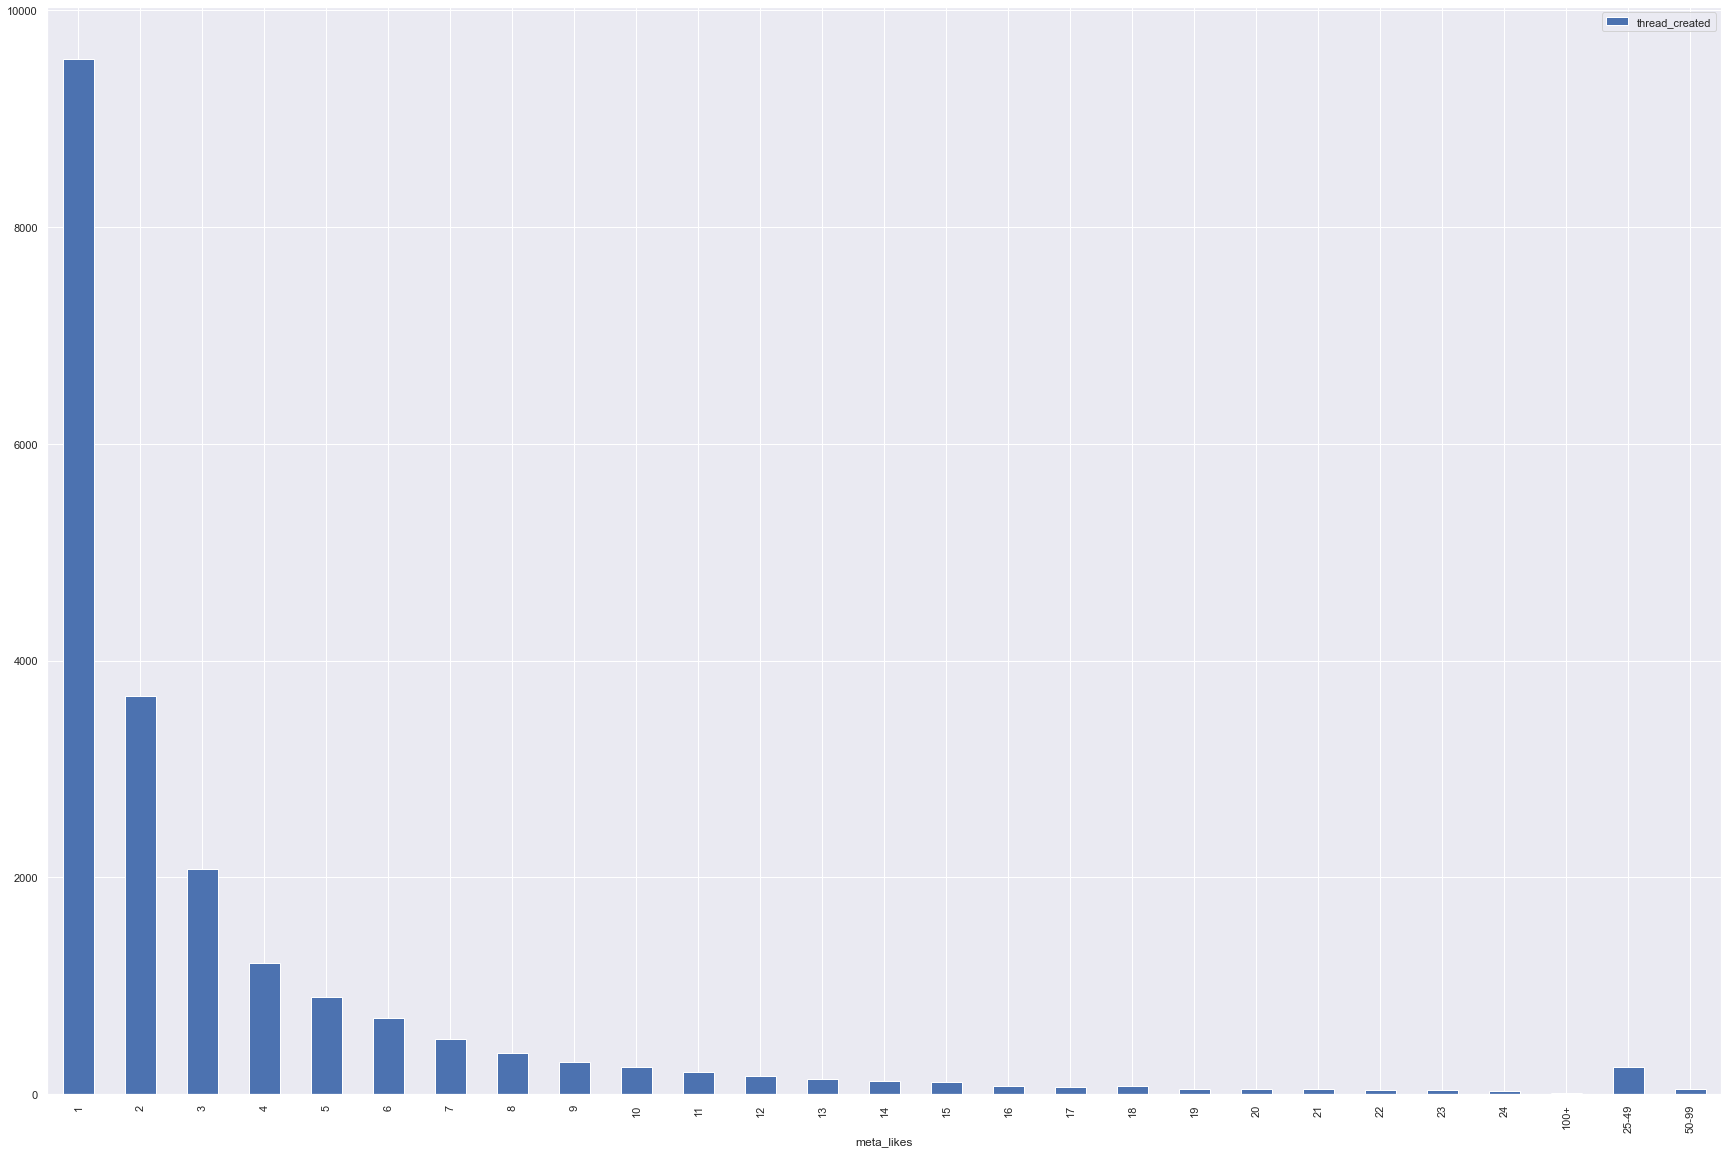

In [168]:
model_df["meta_likes"] = model_df["meta_likes"].map(amount)
model_df = df1.groupby(by="meta_likes").count().reset_index()
model_df = model_df.loc[model_df["meta_likes"] != 0]
model_df.plot.bar(x="meta_likes", y="thread_created")
#sns.barplot(x="percentage of total posts", y="user", data=model_df)

In [169]:
#sns.barplot(x="percentage of total posts", y="user", data=calculated_df)

In [170]:
#sns.regplot('total posts', 'active threads', data=calculated_df)

In [171]:
r2_score(calculated_df['total posts'], calculated_df['active threads'])

0.28457805905435785

In [172]:
unique_users = calculated_df["user"].unique
unique_users

<bound method Series.unique of 0           NanoQ
1       pantherdk
2         grovfil
3           Jigra
4        Torstens
          ...    
1474    abberline
1475    Casper_PL
1476      Gasberg
1477    Lord dahl
1478       Hondje
Name: user, Length: 1479, dtype: object>

**Superposter SP1**

In [173]:
superposters = calculated_df.loc[calculated_df["percentage of total posts"] >= 1.0]
superposters = superposters[["user", "user_created", "total posts", "percentage of total posts"]]
superposters#["user_created"].value_counts()
#superposters.to_excel("superposters_tabel.xlsx")
sp1_sample = ["NanoQ", "pantherdk", "Aurvandil", "Nilsson"]
superposters["SP"] = "SP"
superposters

,user,user_created,total posts,percentage of total posts,SP
0,NanoQ,2005,1654,2.65,SP
1,pantherdk,2004,1370,2.19,SP
2,grovfil,2005,911,1.46,SP
3,Jigra,2014,911,1.46,SP
4,Torstens,2005,835,1.34,SP
5,slettet-bruger-54253,2016,829,1.33,SP
6,Tsunemi,2013,751,1.20,SP
7,prangstar,2008,715,1.15,SP
8,tuznelda,2008,662,1.06,SP
9,Kongs,2011,661,1.06,SP


In [174]:
for name in sp1_sample:
    print(name)


NanoQ
pantherdk
Aurvandil
Nilsson


In [175]:
sp1_posts = df1[df1["user"].isin(sp1_sample)]
columns = sp1_posts.columns
sp1_threads = pd.DataFrame(columns=columns)

#sp1_threads = pd.concat([sp1_threads, sp1_posts.loc[sp1_posts["user"] == "pantherdk"].sample(n=3)])
for name in sp1_sample:
   sp1_threads = pd.concat([sp1_threads, sp1_posts.loc[sp1_posts["user"] == name].sample(n=2)])
sp1_threads

,thread,thread_created,user,user_link,user_created,user_post_amount,comment_text,meta_date_time,meta_rank_order,meta_likes,reply
41930,Rate den sidste film/serie du har set ... ... ...,2019-02-10,NanoQ,https://www.pokernet.dk/profiler/3472.html,2005,11355,"Jeg tillader mig, at lave en lille hijack. Jeg...",2019-06-24 11:43:00,277,0,None
37228,X-faktor 2019,2019-03-01,NanoQ,https://www.pokernet.dk/profiler/3472.html,2005,11355,Live var kedelig... Jeg ville helst se hende o...,2019-08-03 21:44:00,27,0,None
4093,Ukraine vs Rusland krig V3,2022-03-05,pantherdk,https://www.pokernet.dk/profiler/686.html,2004,6666,Kulturbutik skrev:\n \n Forstår godt hvad du s...,2022-08-03 21:05:00,164,2,Kulturbutik skrev
5656,Ukraine vs Rusland krig V2.,2022-02-28,pantherdk,https://www.pokernet.dk/profiler/686.html,2004,6666,NanoQ skrev:\n \n Risikoen ved at sende fly er...,2022-04-03 09:01:00,465,1,NanoQ skrev
50376,Forslag til skiferie,2018-11-28,Aurvandil,https://www.pokernet.dk/profiler/29195.html,2005,9290,Nu kom jeg lige i tanke om denne tråd i forbin...,2019-11-02 20:32:00,19,0,None
30609,George Floyd,2020-05-27,Aurvandil,https://www.pokernet.dk/profiler/29195.html,2005,9290,Silan skrev:\nhttps://www.nature.com/articles/...,2020-08-31 13:48:00,305,0,Silan skrev
57879,​​​MIT PLASTIKMARERIDT SØGER MEDVIRKENDE,2018-08-29,Nilsson,https://www.pokernet.dk/profiler/31519.html,2006,10083,superKrikken skrev:@godpreben\r\nHun har sendt...,2018-08-29 16:50:00,22,11,superKrikken skrev
51760,Brøndby-tråden 2018/19,2018-06-06,Nilsson,https://www.pokernet.dk/profiler/31519.html,2006,10083,"moktar skrev: jo, men det bliver da eksempelv...",2018-01-09 09:18:00,506,2,moktar skrev


In [176]:
sp1_threads_and_posts = df1[df1["thread"].isin(sp1_threads["thread"])]
sp1_threads_and_posts.to_excel("sp1_dataset.xlsx")

**Agendasetter SP2**

In [177]:

#calculated_df["total threads created"].quantile(0.98)
agendasetters = calculated_df.loc[calculated_df["total threads created"] >= calculated_df["total threads created"].quantile(0.99)]
agendasetters = agendasetters[["user", "user_created", "total posts", "total threads created"]].sort_values(by="total threads created", ascending=False)
agendasetters.style.hide_index().to_excel("agendasetters tabel.xlsx")
sp2_sample = ["Newtood", "All-Out-Put", "nikzz", "TUD73"]
agendasetters["SP"] = "SP"
agendasetters


,user,user_created,total posts,total threads created,SP
88,Newtood,2016,168,35,SP
43,All-Out-Put,2006,280,25,SP
34,cains,2007,335,21,SP
92,Rambam,2006,156,19,SP
8,tuznelda,2008,662,17,SP
120,Henze05,2008,119,17,SP
98,nafudoma,2005,147,16,SP
18,Bridgeking,2006,560,15,SP
21,Holstt,2006,470,15,SP
9,Kongs,2011,661,14,SP


In [178]:
sp2_posts = df1[df1["user"].isin(sp2_sample)]
sp2_posts = sp2_posts.loc[sp2_posts["meta_rank_order"]==1]
columns = sp2_posts.columns
sp2_threads = pd.DataFrame(columns=columns)

#sp1_threads = pd.concat([sp1_threads, sp1_posts.loc[sp1_posts["user"] == "pantherdk"].sample(n=3)])
for name in sp2_sample:
#sp2_posts.loc[sp2_posts["user"] == "All-Out-Put"]
   sp2_threads = pd.concat([sp2_threads, sp2_posts.loc[sp2_posts["user"] == name].sample(n=2)])

sp2_threads

,thread,thread_created,user,user_link,user_created,user_post_amount,comment_text,meta_date_time,meta_rank_order,meta_likes,reply
47610,Fodbold transfers og kontrakter,2019-04-16,Newtood,https://www.pokernet.dk/profiler/53961.html,2016,319,Som så mange andre venter jeg spændt på at se ...,2019-04-16 03:29:00,1,0,None
47557,3 måneder i USA must see?,2019-04-25,Newtood,https://www.pokernet.dk/profiler/53961.html,2016,319,Vi har besluttet at tage 3 måneder til USA + d...,2019-04-25 01:25:00,1,0,None
29447,Holdet.dk Tourspillet Pokernetpulje (med udski...,2020-08-21,All-Out-Put,https://www.pokernet.dk/profiler/32574.html,2006,2707,Så nærmer årets Tour De France sig. Som altid ...,2020-08-21 14:06:00,1,1,None
17901,Holdet.dk Girospillet Pokernetpulje (MED udski...,2021-04-29,All-Out-Put,https://www.pokernet.dk/profiler/32574.html,2006,2707,"Årets Giro De Italia nærmer sig hastigt, og so...",2021-04-29 21:44:00,1,1,None
53563,Ny metode til at lave flæskesteg,2018-12-20,nikzz,https://www.pokernet.dk/profiler/39804.html,2009,10826,Jeg har brug for noget nyt inspiration til flæ...,2018-12-20 18:03:00,1,1,None
17412,Grill Forår 2021,2020-06-27,nikzz,https://www.pokernet.dk/profiler/39804.html,2009,10826,Den anden tråd var blevet mega langsomt at loa...,2020-06-27 08:22:00,1,5,None
29066,Holdet.dk Champions Manager 2019-2020,2019-09-11,TUD73,https://www.pokernet.dk/profiler/37150.html,2008,1854,Krav for deltagelse:\n* Man skal være Pokernet...,2019-11-09 18:33:00,1,2,None
10202,Holdet.dk Superliga efterår 2021 - Spillet er...,2021-06-28,TUD73,https://www.pokernet.dk/profiler/37150.html,2008,1854,Krav for deltagelse:\n* Man skal være Pokernet...,2021-06-28 01:08:00,1,0,None


In [179]:
sp2_threads_and_posts = df1[df1["thread"].isin(sp2_threads["thread"])]
sp2_threads_and_posts.to_excel("sp2_dataset.xlsx")
sp2_threads_and_posts.thread.value_counts()

Holdet.dk Tourspillet Pokernetpulje (med udskiftninger)    184
Holdet.dk Girospillet Pokernetpulje (MED udskiftninger)    107
Holdet.dk Superliga efterår 2021 -  Spillet er i gang!      82
Grill Forår 2021                                            69
Holdet.dk Champions Manager 2019-2020                       63
Ny metode til at lave flæskesteg                            62
Fodbold transfers og kontrakter                             53
3 måneder i USA must see?                                   16
Name: thread, dtype: int64

**Facilitators SP3**

In [180]:

#print(calculated_df["posts per thread"].mean())
facilitators = calculated_df.loc[calculated_df["active threads"] >= calculated_df["active threads"].quantile(0.98)]
#print(facilitators["posts per thread"].mean())
facilitators = facilitators.loc[facilitators["posts per thread"] <= facilitators["posts per thread"].mean()]
facilitators = facilitators[["user", "user_created", "total posts", "active threads", "posts per thread"]].sort_values(by="posts per thread", ascending=True)
#facilitators.sort_values(by="active threads", ascending=False).to_excel("facilitators tabel.xlsx")
sp3_sample = ["dankjar", "Hawkeye", "Micebulldogs", "kris_rem"]
facilitators["SP"] = "SP"
facilitators
#facilitators.style.hide_index().to_excel("facilitators tabel.xlsx"

,user,user_created,total posts,active threads,posts per thread,SP
81,kris_rem,2005,176,98,1.80,SP
72,Micebulldogs,2010,197,105,1.88,SP
64,Allundberg,2012,215,104,2.07,SP
63,psylenz,2005,216,92,2.35,SP
59,fedesen,2003,227,96,2.36,SP
56,nothing878,2006,236,98,2.41,SP
12,Aurvandil,2005,639,245,2.61,SP
39,Turbofluen,2005,300,115,2.61,SP
32,XSUPERBULLX,2006,339,130,2.61,SP
35,moktar,2008,334,127,2.63,SP


In [187]:
merged_df = calculated_df.merge(superposters, how="left", on="user")
merged_df = merged_df.merge(agendasetters, how="left", on="user")
merged_df = merged_df.merge(facilitators, how="left", on="user")
merged_df = merged_df[["user", "user_created_x", "total posts_x", "active threads_x", "posts per thread_x", "SP"]]
merged_df["SP"] = merged_df["SP"].fillna("Not SP")

merged_df
#sns.scatterplot(merged_df, x="total posts_x", hue="SP")


#
#merged_df.plot()

KeyError: 5

In [ ]:
sp3_posts = df1[df1["user"].isin(sp3_sample)]
columns = sp3_posts.columns
sp3_threads = pd.DataFrame(columns=columns)

#sp1_threads = pd.concat([sp1_threads, sp1_posts.loc[sp1_posts["user"] == "pantherdk"].sample(n=3)])
for name in sp3_sample:
#sp2_posts.loc[sp2_posts["user"] == "All-Out-Put"]
   sp3_threads = pd.concat([sp3_threads, sp3_posts.loc[sp3_posts["user"] == name].sample(n=2)])

sp3_threads

,thread,thread_created,user,user_link,user_created,user_post_amount,comment_text,meta_date_time,meta_rank_order,meta_likes,reply
1480,Skift fra naturgas til ?,2022-02-12,dankjar,https://www.pokernet.dk/profiler/780.html,2004,2708,Qured skrev:Findes der et godt sted at indhent...,2022-09-03 09:23:00,78,0,Qured skrev
12337,Bitcoin V6,2021-05-21,dankjar,https://www.pokernet.dk/profiler/780.html,2004,2708,hostrup skrev:\n \nJeg har ikke lyst til at ...,2021-06-08 17:00:00,429,0,hostrup skrev
4440,Freespins 2021 (og andet +ev relateret),2021-01-14,Hawkeye,https://www.pokernet.dk/profiler/31879.html,2006,22632,Fantomet skrev:Meget lille kampagne på bet25/r...,2021-01-15 16:23:00,17,0,Fantomet skrev
15443,Hjælp mig PN: Har jeg en sag? Eller er jeg en ...,2021-08-10,Hawkeye,https://www.pokernet.dk/profiler/31879.html,2006,22633,"FrederikListe skrev:Ja, altså det har jeg også...",2021-10-08 12:25:00,4,0,FrederikListe skrev
62320,Clemme er sur,2018-04-18,Micebulldogs,https://www.pokernet.dk/profiler/44701.html,2010,12219,Haha ... god gamle Clemme1982 ... Han var vids...,2018-04-18 15:49:00,10,1,None
61721,El-cykel på Sweetdeal?,2018-05-21,Micebulldogs,https://www.pokernet.dk/profiler/44701.html,2010,12219,stop nu jer selv ... der kan være uendelig man...,2018-05-21 15:36:00,8,9,None
24393,Mangler du et job akut - ATP søger 700 personer,2021-01-19,kris_rem,https://www.pokernet.dk/profiler/1963.html,2005,11936,"GodPreben skrev: Jo, tænker godt man kan komm...",2021-01-19 22:06:00,11,0,GodPreben skrev
23652,Super Bowl LV,2021-02-01,kris_rem,https://www.pokernet.dk/profiler/1963.html,2005,11936,Som de seneste år tager jeg gerne 500 på et af...,2021-01-02 22:08:00,2,0,None


In [ ]:
sp3_threads_and_posts = df1[df1["thread"].isin(sp3_threads["thread"])]
sp3_threads_and_posts.to_excel("sp3_dataset.xlsx")
sp3_threads_and_posts

,thread,thread_created,user,user_link,user_created,user_post_amount,comment_text,meta_date_time,meta_rank_order,meta_likes,reply
1403,Skift fra naturgas til ?,2022-02-12,JinXXX,https://www.pokernet.dk/profiler/48496.html,2012,3954,Hey. Har naturgas / 122m2 hus. og kan godt fo...,2022-12-02 08:04:00,1,0,None
1404,Skift fra naturgas til ?,2022-02-12,nikzz,https://www.pokernet.dk/profiler/39804.html,2009,10826,Hvorfor vil du skifte fra gas nu (meget gamle ...,2022-12-02 08:28:00,2,0,None
1405,Skift fra naturgas til ?,2022-02-12,moktar,https://www.pokernet.dk/profiler/37537.html,2008,2256,"Kører gas lidt endnu, da der er fjernvarmeplan...",2022-12-02 09:05:00,3,0,None
1406,Skift fra naturgas til ?,2022-02-12,nikzz,https://www.pokernet.dk/profiler/39804.html,2009,10826,"moktar skrev:Kører gas lidt endnu, da der er f...",2022-12-02 09:13:00,4,0,moktar skrev
1407,Skift fra naturgas til ?,2022-02-12,Bjorn191,https://www.pokernet.dk/profiler/35989.html,2007,258,"Flyttet i hus for 3 år siden, selvfølgelig med...",2022-12-02 09:52:00,5,1,None
...,...,...,...,...,...,...,...,...,...,...,...
62320,Clemme er sur,2018-04-18,Micebulldogs,https://www.pokernet.dk/profiler/44701.html,2010,12219,Haha ... god gamle Clemme1982 ... Han var vids...,2018-04-18 15:49:00,10,1,None
62321,Clemme er sur,2018-04-18,Aurvandil,https://www.pokernet.dk/profiler/29195.html,2005,9290,Indtil marts 2016 gav han kun gode anmeldelser...,2018-04-18 19:47:00,11,14,None
62322,Clemme er sur,2018-04-18,MFNN,https://www.pokernet.dk/profiler/147.html,2004,10532,Jeg var også positiv herinde i størsteparten a...,2018-04-19 16:43:00,12,0,None
62323,Clemme er sur,2018-04-18,simon900,https://www.pokernet.dk/profiler/37119.html,2008,1397,Jeg har åbenlyst ikke være aktiv selv da Clemm...,2018-04-19 17:30:00,13,1,None


In [ ]:
import torch
from transformers import AutoTokenizer
from model_def import ElectraClassifier

def load_model():
    model_checkpoint = 'Maltehb/aelaectra-danish-electra-small-cased'
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

    model = ElectraClassifier(model_checkpoint,2)
    model_path = 'pytorch_model.bin'
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))

    model.eval()

    return(model, tokenizer)

def make_prediction(text):
    
    tokenized_text = tokenizer(
        text,
        truncation=True,
        max_length=512,
        padding='max_length',
        return_attention_mask=True,
        return_token_type_ids=False,
        return_tensors='pt',
    )
    input_ids = tokenized_text['input_ids']
    attention_masks = tokenized_text['attention_mask']
    logits = model(input_ids,attention_masks)
    
    logit,preds = torch.max(logits, dim=1)
    return(int(preds))



In [ ]:
#model, tokenizer = load_model()

In [ ]:
#df1["recognition"] = df1["comment_text"].map(make_prediction)